In [122]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

import sklearn

## Загрузка данных

In [123]:
PATH_TO_TRAIN = 'train.csv'
PATH_TO_TEST = 'test.csv'

PATH_TO_PREPARED_TRAIN = 'train_prepared.csv'
PATH_TO_PREPARED_TEST = 'test_prepared.csv'

In [124]:
X = pd.read_csv(PATH_TO_TRAIN)
y = pd.read_csv(PATH_TO_TEST)

X.set_index('Id', inplace=True)
y.set_index('Id', inplace=True)

## Описание датасета:
    - Id - идентификационный номер квартиры
    - DistrictId - идентификационный номер района
    - Rooms - количество комнат
    - Square - площадь
    - LifeSquare - жилая площадь
    - KitchenSquare - площадь кухни
    - Floor - этаж
    - HouseFloor - количество этажей в доме
    - HouseYear - год постройки дома
    - Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
    - Social_1, Social_2, Social_3 - социальные показатели местности
    - Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
    - Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
    - Price - цена квартиры

## Обзор данных

In [125]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

### Обзор количественных переменных

In [126]:
X_num_features = X.select_dtypes(include=['float', 'int', 'uint8'])
y_num_features = y.select_dtypes(include=['float', 'int', 'uint8'])
X_num_features.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Id,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644


In [127]:
y

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B


### Обзор номинативных переменных

In [128]:
X_obj_features = X.select_dtypes(include=['object'])
y_obj_features = y.select_dtypes(include=['object'])
X_obj_features.head()

,Ecology_2,Ecology_3,Shops_2
Id,,,
14038,B,B,B
15053,B,B,B
4765,B,B,B
5809,B,B,B
10783,B,B,B


In [129]:
X['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [130]:
X['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [131]:
X['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

## Оценка распредения целевой переменной в разрезе других признаков

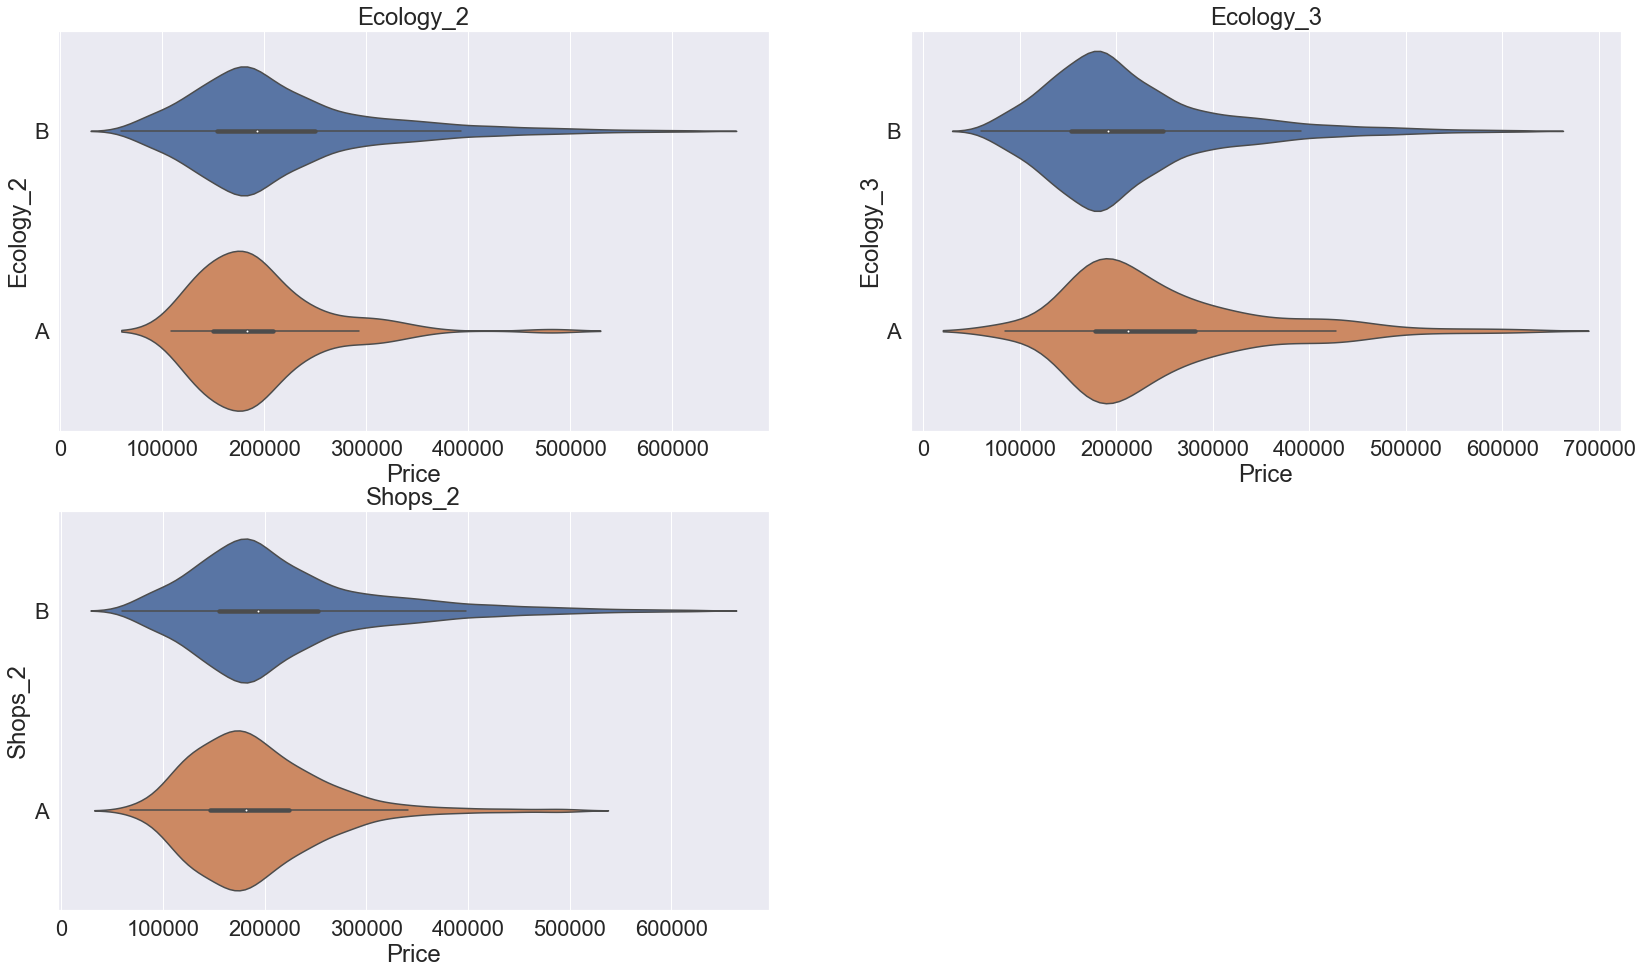

In [132]:
plt.figure(figsize = (28,25))

for i, clname in enumerate(X_obj_features):
    plt.subplot(3,2,i+1)
    plt.title(clname)
    sns.violinplot(X['Price'], X[clname])
    
plt.show()

In [133]:
target_mean = round(X['Price'].mean(), 2)
target_median = X['Price'].median()
target_mode = round(X['Price'] / 1000).mode()[0] * 1000

target_mean, target_median, target_mode

(214138.86, 192269.64487934904, 184000.0)

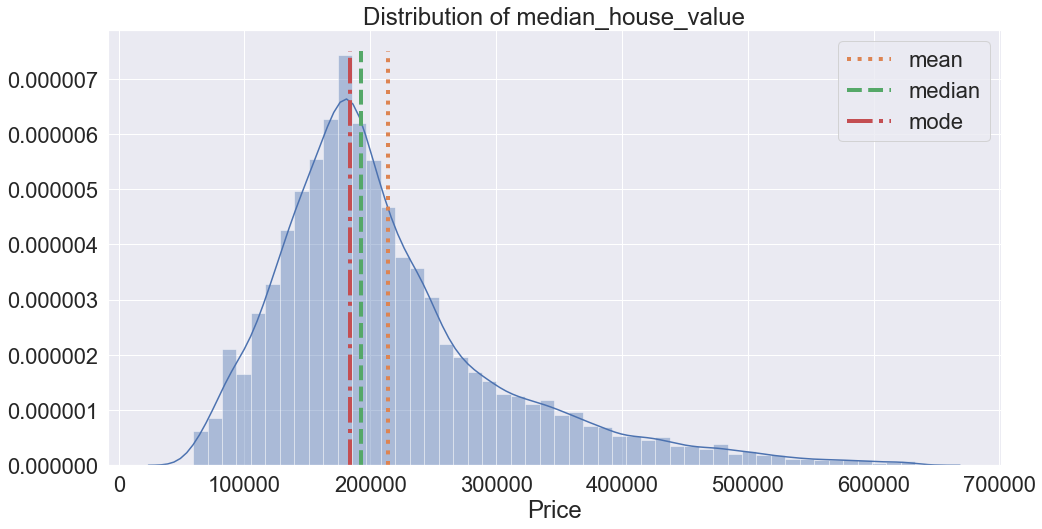

In [134]:
plt.figure(figsize = (16, 8))

sns.distplot(X['Price'])

line = np.linspace(0, 0.0000075, 100)
plt.plot([target_mean] * 100, line, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, line, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 100, line, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

## Матрица коореляции

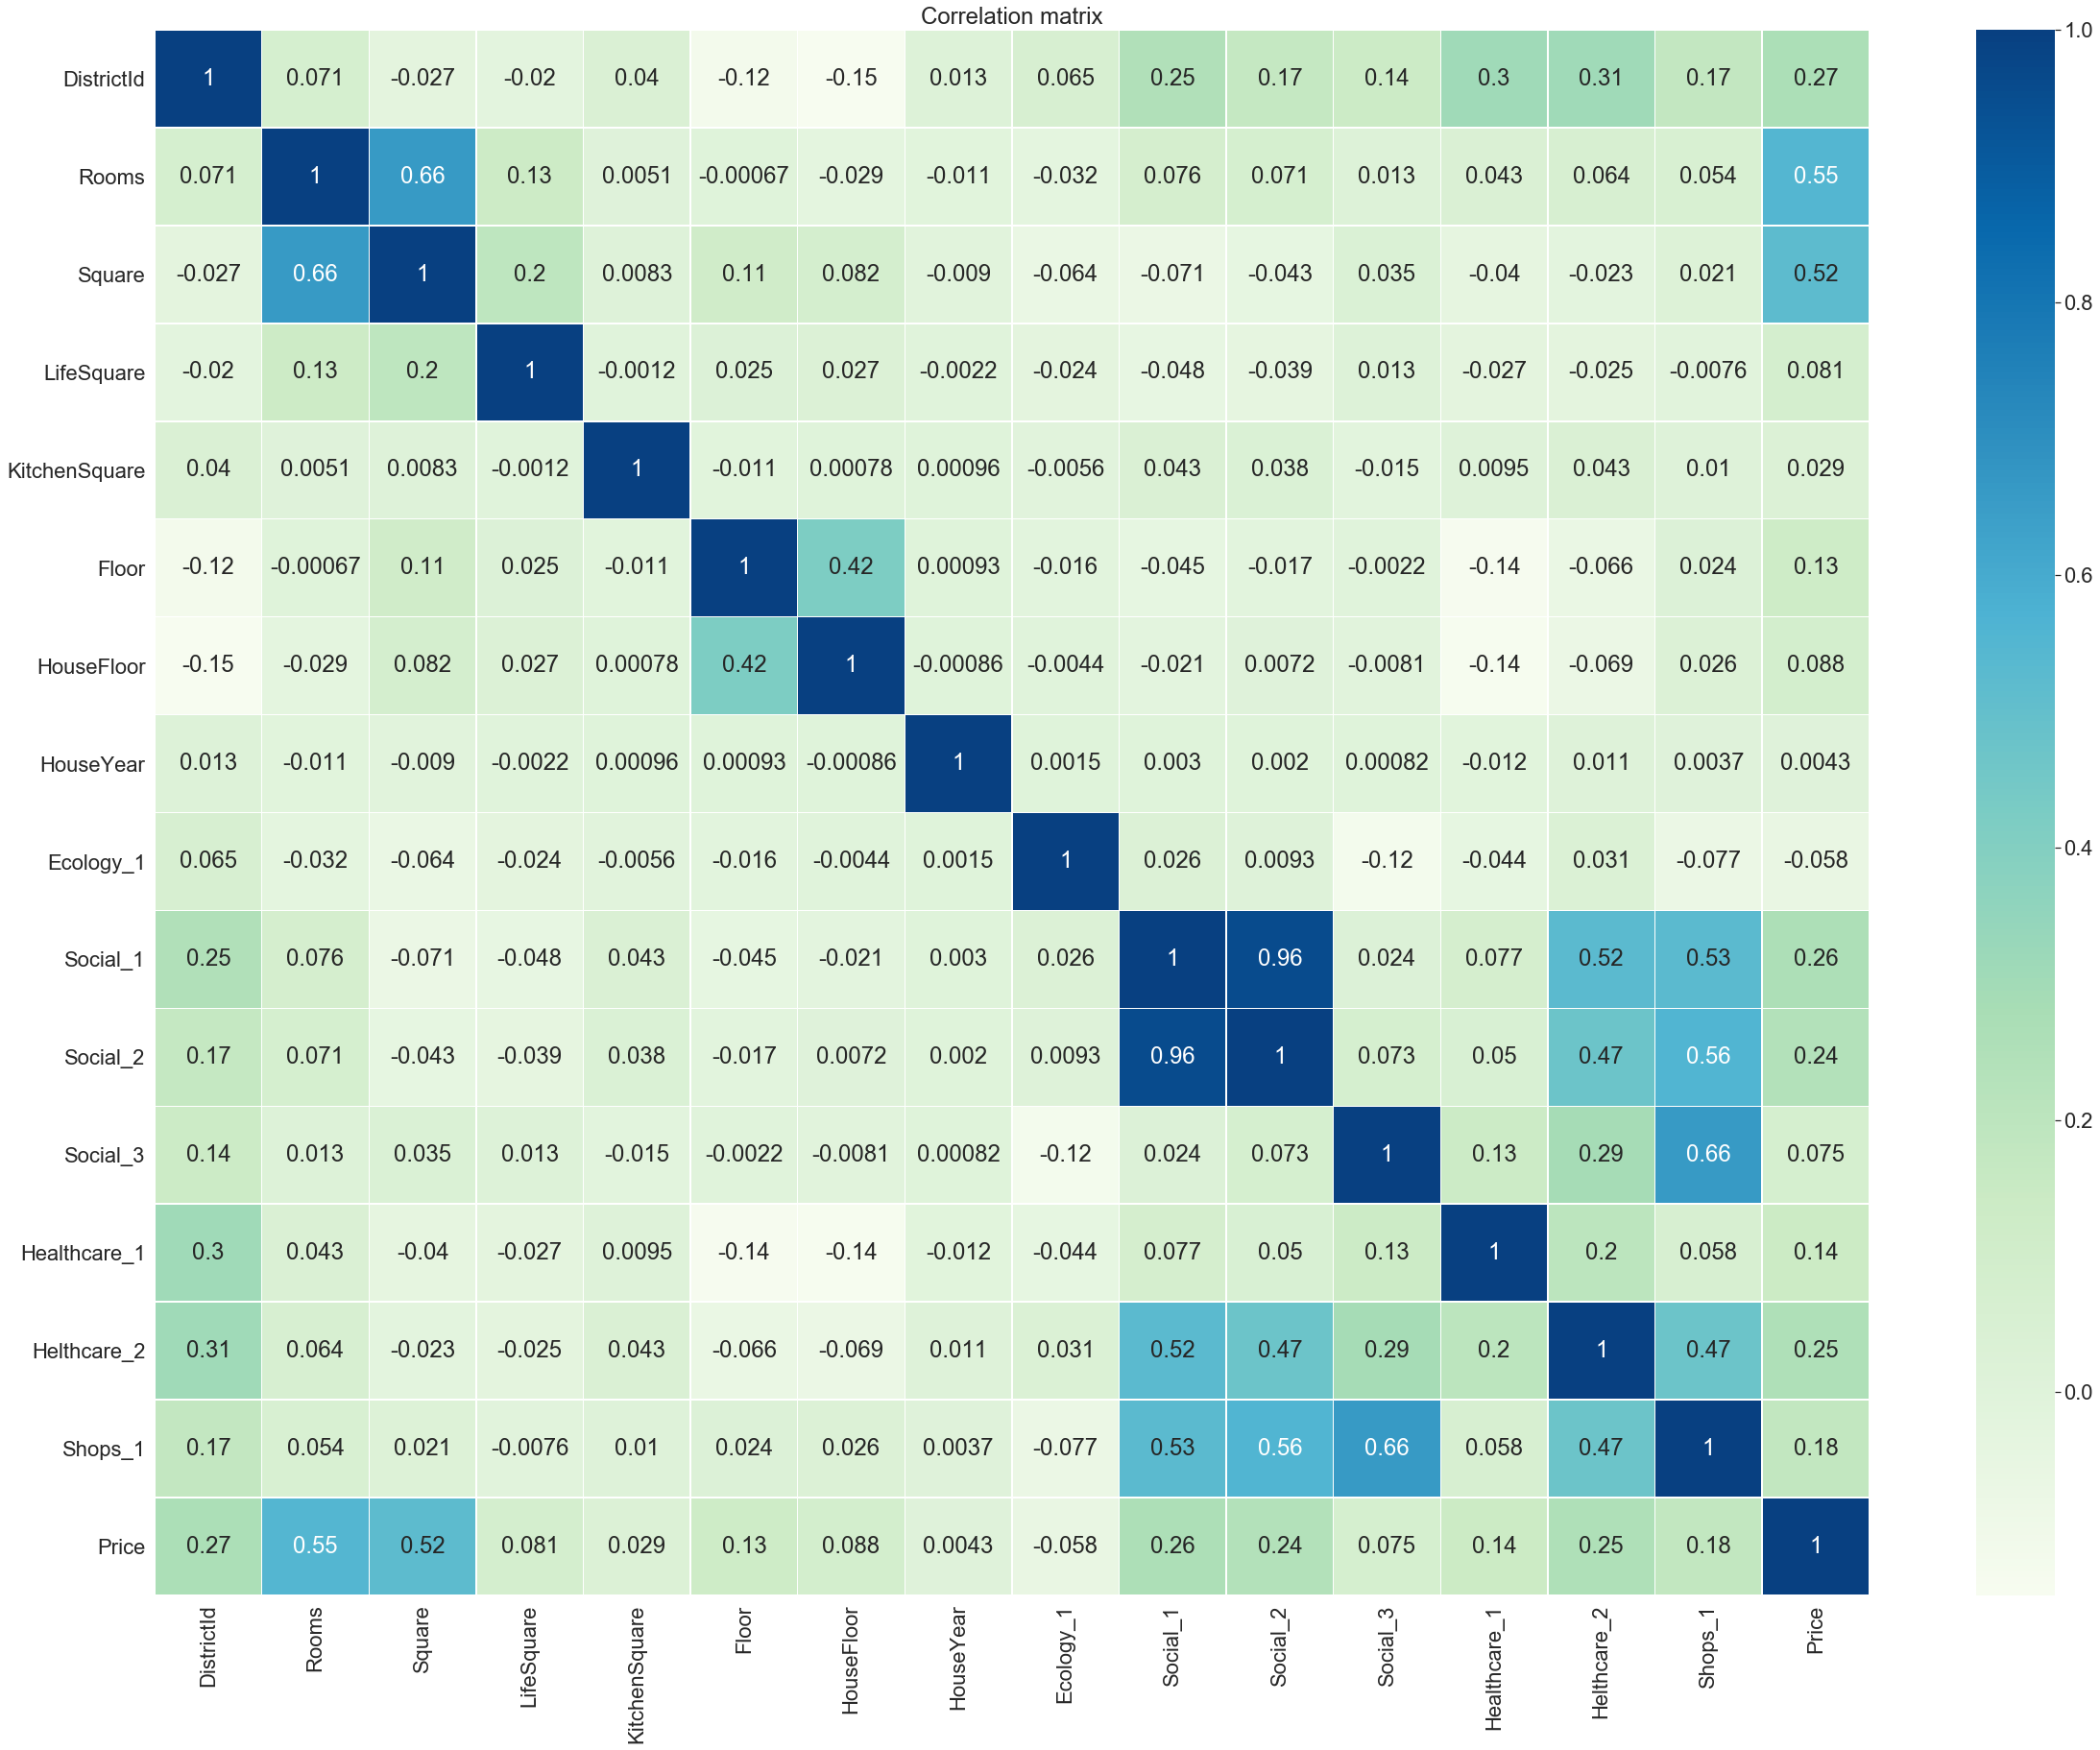

In [135]:
plt.figure(figsize = (40,30))

sns.set(font_scale=2)
sns.heatmap(X.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

### Отбор признаков с коореляцией больше 0.95 и их коореляция с таргетом

In [136]:
bool = (X.corr().values != 1) & (X.corr().values > 0.95)
list_of_big_corr = X.corr()[bool].index.tolist()
list_of_big_corr.append('Price')
X.corr().loc[bool, list_of_big_corr]


,Social_1,Social_2,Price
Social_1,1.000000,0.955988,0.263286
Social_2,0.955988,1.000000,0.239226


## Преобразование категориальных признаков в бинарные

In [137]:
pd.get_dummies(X_obj_features, drop_first=True)

,Ecology_2_B,Ecology_3_B,Shops_2_B
Id,,,
14038,1,1,1
15053,1,1,1
4765,1,1,1
5809,1,1,1
10783,1,1,1
...,...,...,...
77,1,1,1
6159,1,1,0
5123,1,1,0


In [138]:
X = pd.concat([X, pd.get_dummies(X_obj_features, drop_first=True)], axis=1)
y = pd.concat([y, pd.get_dummies(y_obj_features, drop_first=True)], axis=1)

In [139]:
X.to_csv(PATH_TO_PREPARED_TRAIN, sep=";")
y.to_csv(PATH_TO_PREPARED_TEST, sep=";")

### подбор параметров GridSearchCV

In [140]:
# parameters = {
#     'n_estimators': [100, 150, 200, 250],
#     'max_features': np.arange(5, 16),
#     'max_depth': np.arange(5, 20),
# }

# clf = GridSearchCV(
#     estimator=RandomForestRegressor(),
#     param_grid=parameters,
#     scoring='r2',
#     cv=5,
# )

In [141]:
# clf.fit(X_train, y_train)

In [142]:
# clf.best_params_
# {'max_depth': 19, 'max_features': 5, 'n_estimators': 250}

In [143]:
# clf.best_score_
# 0.7357355591446368

## Замена DistrictId на среднее значение цены за м2 по району

In [144]:
X.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_B,Ecology_3_B,Shops_2_B
Id,,,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,...,7976,5,NaN,0,11,B,184966.930730,1,1,1
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,...,10309,1,240.0,1,16,B,300009.450063,1,1,1
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,...,7759,0,229.0,1,3,B,220925.908524,1,1,1
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,...,5735,3,1084.0,0,5,B,175616.227217,1,1,1
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,...,5776,1,2078.0,2,4,B,150226.531644,1,1,1


In [145]:
price_for_metrs2_in_district = X[['DistrictId']].copy()

In [146]:
price_for_metrs2_in_district['Price_m2_by_DistristId'] = X['Price'] / X['Square']

In [147]:
gb = price_for_metrs2_in_district.groupby("DistrictId")
price_for_metrs2_in_district = gb['Price_m2_by_DistristId'].mean()
price_for_metrs2_in_district

DistrictId
0      3710.401014
1      3522.839502
2      4560.204511
3      3783.790553
4      5247.142313
          ...     
202    7447.527733
205    5101.016598
207    5550.678339
208    8005.605047
209    4176.437542
Name: Price_m2_by_DistristId, Length: 205, dtype: float64

In [148]:
X = pd.merge(X.reset_index(), price_for_metrs2_in_district, how='left', on='DistrictId')
y = pd.merge(y.reset_index(), price_for_metrs2_in_district, how='left', on='DistrictId')

X.set_index('Id', inplace=True)
y.set_index('Id', inplace=True)

In [149]:
y.loc[y['Price_m2_by_DistristId'].isnull(), 'Price_m2_by_DistristId'] = y['Price_m2_by_DistristId'].median()

In [150]:
X.drop('DistrictId', axis=1, inplace=True)
y.drop('DistrictId', axis=1, inplace=True)

## Обработка пропусков

In [151]:
len(X) - X.count()

Rooms                        0
Square                       0
LifeSquare                2113
KitchenSquare                0
Floor                        0
HouseFloor                   0
HouseYear                    0
Ecology_1                    0
Ecology_2                    0
Ecology_3                    0
Social_1                     0
Social_2                     0
Social_3                     0
Healthcare_1              4798
Helthcare_2                  0
Shops_1                      0
Shops_2                      0
Price                        0
Ecology_2_B                  0
Ecology_3_B                  0
Shops_2_B                    0
Price_m2_by_DistristId       0
dtype: int64

In [152]:
X['Healthcare_1'].describe()

count    5202.000000
mean     1142.904460
std      1021.517264
min         0.000000
25%       350.000000
50%       900.000000
75%      1548.000000
max      4849.000000
Name: Healthcare_1, dtype: float64

## Заполнение Healthcare_1 с помощью модели RandomForestRegressor на основе признаков связанных с местностью

In [153]:
# отбор признаков связанных с районом
District_features_list = ['Ecology_1', 'Ecology_2_B', 'Ecology_3_B', 'Social_1', 'Social_2', 'Social_3', 
                          'Helthcare_2', 'Shops_1', 'Shops_2_B', 'Price_m2_by_DistristId', 'Healthcare_1']
X_District_features_full_Healthcare_1 = X.loc[~X['Healthcare_1'].isnull(), District_features_list]

District_features_list.remove('Healthcare_1')
X_District_features_empty_Healthcare_1 = X.loc[X['Healthcare_1'].isnull(), District_features_list]

X_District_features_full_Healthcare_1

,Ecology_1,Ecology_2_B,Ecology_3_B,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2_B,Price_m2_by_DistristId,Healthcare_1
Id,,,,,,,,,,,
15053,0.000070,1,1,46,10309,1,1,16,1,4293.480295,240.0
4765,0.049637,1,1,34,7759,0,1,3,1,4835.401165,229.0
5809,0.437885,1,1,23,5735,3,0,5,1,3021.675025,1084.0
10783,0.012339,1,1,35,5776,1,2,4,1,3938.329635,2078.0
12915,0.309479,1,1,35,7715,4,0,6,1,4746.494431,990.0
...,...,...,...,...,...,...,...,...,...,...,...
15233,0.036270,1,1,6,1318,1,1,1,1,3522.839502,200.0
11553,0.265089,1,1,37,5288,0,3,2,1,3783.790553,1937.0
77,0.135650,1,1,46,7960,6,3,11,1,5008.861902,350.0


In [154]:
parameters = {
    'n_estimators': [200],
    'max_features': [6],
    'max_depth': [6],
    'random_state': [26]
}

model_RFR_for_Healthcare_1 = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=parameters,
    scoring='r2',
    cv=5,
)

In [155]:
model_RFR_for_Healthcare_1.fit(X_District_features_full_Healthcare_1.drop('Healthcare_1', axis = 1),
                               X_District_features_full_Healthcare_1['Healthcare_1'])

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [156]:
X_new_Healthcare_1_predict = model_RFR_for_Healthcare_1.predict(X_District_features_empty_Healthcare_1)
X_new_Healthcare_1_predict

array([1143.48199959, 1488.21875854,  905.60069049, ...,  969.38980233,
        689.63668241,  415.85921483])

In [157]:
X.loc[X['Healthcare_1'].isnull(), 'Healthcare_1'] = X_new_Healthcare_1_predict

In [158]:
X.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_B,Ecology_3_B,Shops_2_B,Price_m2_by_DistristId
Id,,,,,,,,,,,,,,,,,,,,,
14038,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,...,5,1143.482,0,11,B,184966.930730,1,1,1,4384.628620
15053,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,...,1,240.000,1,16,B,300009.450063,1,1,1,4293.480295
4765,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,...,0,229.000,1,3,B,220925.908524,1,1,1,4835.401165
5809,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,...,3,1084.000,0,5,B,175616.227217,1,1,1,3021.675025
10783,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,...,1,2078.000,2,4,B,150226.531644,1,1,1,3938.329635


In [159]:
y_District_features_empty_Healthcare_1 = y.loc[y['Healthcare_1'].isnull(), ['Ecology_1', 'Ecology_2_B', 'Ecology_3_B', 'Social_1', 'Social_2', 'Social_3', 
                          'Helthcare_2', 'Shops_1', 'Shops_2_B', 'Price_m2_by_DistristId']]

In [160]:
y_new_Healthcare_1_predict = model_RFR_for_Healthcare_1.predict(y_District_features_empty_Healthcare_1)
y_new_Healthcare_1_predict

array([ 650.25915104,  905.60069049, 2628.70220234, ...,  435.72671987,
       1650.55610314,  418.72690637])

In [161]:
y.loc[y['Healthcare_1'].isnull(), 'Healthcare_1'] = y_new_Healthcare_1_predict

## Обработка выбросов

In [162]:
X.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_B,Ecology_3_B,Shops_2_B,Price_m2_by_DistristId
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1037.190693,1.319500,4.231300,214138.857399,0.990300,0.972500,0.917500,3988.383777
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,818.748359,1.493601,4.806341,92872.293865,0.098015,0.163543,0.275139,1012.904277
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000,2284.108677
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,449.440448,0.000000,1.000000,153872.633942,1.000000,1.000000,1.000000,3021.675025
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,870.531719,1.000000,3.000000,192269.644879,1.000000,1.000000,1.000000,4084.464328
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1393.177184,2.000000,6.000000,249135.462171,1.000000,1.000000,1.000000,4553.239744
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000,9452.113505


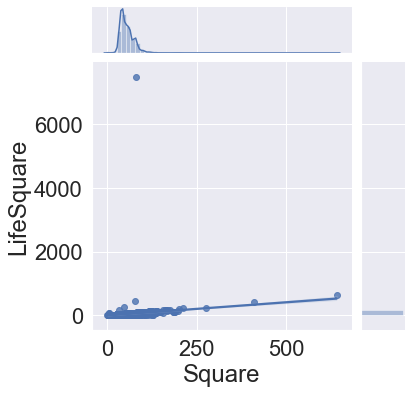

In [163]:
sns.jointplot(X['Square'], X['LifeSquare'], kind='reg')

In [164]:
X.loc[X['LifeSquare'] > 3000, 'LifeSquare'] = X['LifeSquare'].median()
y.loc[y['LifeSquare'] > 3000, 'LifeSquare'] = X['LifeSquare'].median()

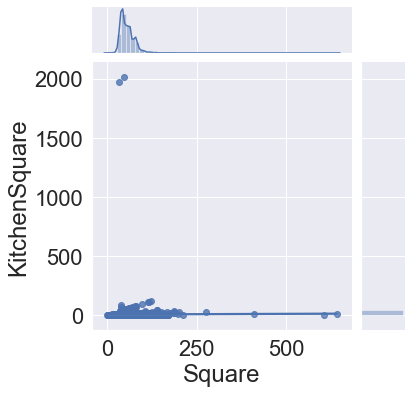

In [165]:
sns.jointplot(X['Square'], X['KitchenSquare'], kind='reg')

In [166]:
X.loc[X['KitchenSquare'] > 1500, 'KitchenSquare'] = X['KitchenSquare'].median()
y.loc[y['KitchenSquare'] > 1500, 'KitchenSquare'] = X['KitchenSquare'].median()

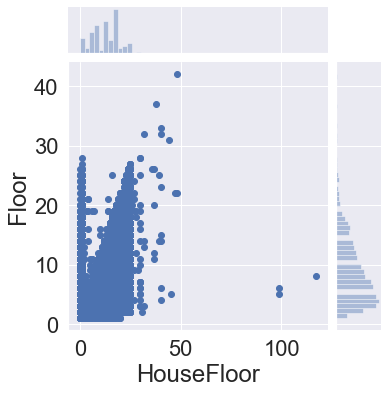

In [167]:
sns.jointplot(X['HouseFloor'], X['Floor'])

In [168]:
X.loc[X['HouseFloor'] < X['Floor'], ['HouseFloor', 'Floor']]

,HouseFloor,Floor
Id,,
11993,0.0,14
10953,4.0,5
2119,5.0,6
11935,1.0,15
6641,0.0,2
...,...,...
2237,9.0,11
16159,1.0,10
4145,24.0,26


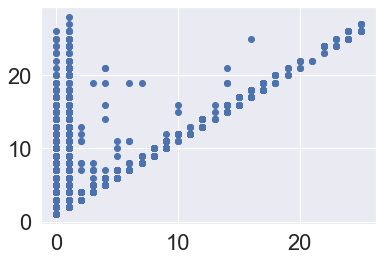

In [169]:
plt.scatter(X.loc[X['HouseFloor'] < X['Floor'], ['HouseFloor']], X.loc[X['HouseFloor'] < X['Floor'], ['Floor']])

In [170]:
X.loc[X['HouseFloor'] < X['Floor'], 'HouseFloor'] = X.loc[X['HouseFloor'] < X['Floor'], 'Floor']
y.loc[y['HouseFloor'] < y['Floor'], 'HouseFloor'] = y.loc[y['HouseFloor'] < y['Floor'], 'Floor']

In [171]:
X.loc[X['HouseYear'] > 2020, 'HouseYear']

Id
10814    20052011
11607        4968
Name: HouseYear, dtype: int64

In [172]:
X.loc[X['HouseYear'] > 2020, 'HouseYear'] = X['HouseYear'].mode()[0]
y.loc[y['HouseYear'] > 2020, 'HouseYear'] = X['HouseYear'].mode()[0]

### Оценка важности параметров третей модели

In [173]:
# f_importance = pd.DataFrame()
# f_importance['name'] = X.drop(['Ecology_2', 'Ecology_3', 'Shops_2', 'Healthcare_1', 'LifeSquare', 'Price'], axis = 1).columns.tolist()
# f_importance['values'] = model_RFR.feature_importances_
# f_importance.sort_values('values', ascending = False).reset_index(drop=True)

## Заполнение пропущенных LifeSquare

In [174]:
X.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_B,Ecology_3_B,Shops_2_B,Price_m2_by_DistristId
Id,,,,,,,,,,,,,,,,,,,,,
14038,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,...,5,1143.482,0,11,B,184966.930730,1,1,1,4384.628620
15053,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,...,1,240.000,1,16,B,300009.450063,1,1,1,4293.480295
4765,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,...,0,229.000,1,3,B,220925.908524,1,1,1,4835.401165
5809,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,...,3,1084.000,0,5,B,175616.227217,1,1,1,3021.675025
10783,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,...,1,2078.000,2,4,B,150226.531644,1,1,1,3938.329635


In [175]:
Xy = pd.concat([X.drop('Price', axis=1), y], axis=0)

In [176]:
Xy_LifeSquare_full = Xy.loc[~Xy['LifeSquare'].isnull()].copy()

In [177]:
Xy_LifeSquare_full['mean_LifeSquare_by_Square'] = Xy_LifeSquare_full['LifeSquare'] / Xy_LifeSquare_full['Square']

In [178]:
coef_LifeSquare = Xy_LifeSquare_full['mean_LifeSquare_by_Square'].mean()
coef_LifeSquare

0.6544605446663125

In [179]:
X.loc[X['LifeSquare'].isnull(), 'LifeSquare'] = X.loc[X['LifeSquare'].isnull(), 'Square'] * coef_LifeSquare

In [180]:
y.loc[y['LifeSquare'].isnull(), 'LifeSquare'] = y.loc[y['LifeSquare'].isnull(), 'Square'] * coef_LifeSquare

## Финальная модель

### Последняя настройка

In [181]:
# parameters = {
#     'n_estimators': [200, 250, 300, 350],
#     'max_features': np.arange(2, 6),
#     'max_depth': np.arange(18, 22),
# }

# final_model_RFR_GS = GridSearchCV(
#     estimator=RandomForestRegressor(),
#     param_grid=parameters,
#     scoring='r2',
#     cv=5
# )

In [182]:
# final_model_RFR_GS.fit(X_train, y_train)

In [183]:
# final_model_RFR_GS.best_score_
# 0.7600221408636404

In [184]:
# final_model_RFR_GS.best_params_
# {'max_depth': 20, 'max_features': 5, 'n_estimators': 250}

In [185]:
final_model_RFR = RandomForestRegressor(max_depth=20, max_features=5, n_estimators=250)

### Обучение и предсказание

In [186]:
final_model_RFR.fit(X.drop(['Ecology_2', 'Ecology_3', 'Shops_2', 'Ecology_2_B', 'Shops_2_B', 'Ecology_3_B', 'Price'], axis = 1), 
              X['Price'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [187]:
y['Price'] = model_RFR.predict(y.drop(['Ecology_2', 'Ecology_3', 'Shops_2', 'Ecology_2_B', 'Shops_2_B', 'Ecology_3_B'], axis = 1))

In [188]:
y['Price'].reset_index().to_csv('final_predict_to_kaggle.csv', index=False)
y.drop('Price', inplace=True, axis=1)